In [3]:
import pandas as pd 
import patsy
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from feature_model import FeatureModel
import contextlib

In [4]:
from ce1_compare import compare, set_name, write_submission_txt,set_idm

In [5]:
set_name("Srusti", "UjjiniMath")
set_idm("qa50zoly")

# CE1 (Inherently explainable models part 1)
    - 1.1 Taking a look at the data: The bike dataset
        - 1.1.1 Fitting a RandomForestRegressor but something seems off..
            - Can you explain please?
        - 1.1.2 Finding the mistake through correlations
    - 1.2 Linear Modeling
        - 1.2.1 The intercept feature
        - 1.2.2 Re-scaling and shifting numerical features: Standardization
        - 1.2.3 Categorical encodings
        
    - Exercises/Homework:
        - 1.1 Standardising data
        - 1.2 LASSO-Regularisation
        - 1.3 Effect plot
        - 1.4 Feature engineering: Adding feature interaction 
        - 1.5 Feature engineering: Custom basis functions 


### 1.1.0 The bike dataset

In [6]:
bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")

In [7]:
bike_data.df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,days_since_01_01_2011
0,1,0,1,0,6,0,2,8.175849,0.805833,0.160446,331,654,985,0
1,1,0,1,0,0,0,2,9.083466,0.696087,0.248539,131,670,801,1
2,1,0,1,0,1,1,1,1.229108,0.437273,0.248309,120,1229,1349,2
3,1,0,1,0,2,1,1,1.400000,0.590435,0.160296,108,1454,1562,3
4,1,0,1,0,3,1,1,2.666979,0.436957,0.186900,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,3.945849,0.652917,0.350133,247,1867,2114,726
727,1,1,12,0,5,1,2,3.906651,0.590000,0.155471,644,2451,3095,727
728,1,1,12,0,6,0,2,3.906651,0.752917,0.124383,159,1182,1341,728
729,1,1,12,0,0,0,1,4.024151,0.483333,0.350754,364,1432,1796,729


#### Let's check out the `datasets/bike/readme.txt` to find out what all these columns represent

In [8]:
bike_data.add_target("cnt")

FeatureModel(->Not fully specified yet!)


In [9]:
bike_data.add_all_features_but_target()

FeatureModel(cnt ~ -1 + season + yr + mnth + holiday + weekday + workingday + weathersit + temp + hum + windspeed + casual + registered + days_since_01_01_2011 )


In [10]:
X, y = bike_data.return_Xy()

In [11]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,days_since_01_01_2011
0,1.0,0.0,1.0,0.0,6.0,0.0,2.0,8.175849,0.805833,0.160446,331.0,654.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,2.0,9.083466,0.696087,0.248539,131.0,670.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.229108,0.437273,0.248309,120.0,1229.0,2.0
3,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.400000,0.590435,0.160296,108.0,1454.0,3.0
4,1.0,0.0,1.0,0.0,3.0,1.0,1.0,2.666979,0.436957,0.186900,82.0,1518.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,1.0,12.0,0.0,4.0,1.0,2.0,3.945849,0.652917,0.350133,247.0,1867.0,726.0
727,1.0,1.0,12.0,0.0,5.0,1.0,2.0,3.906651,0.590000,0.155471,644.0,2451.0,727.0
728,1.0,1.0,12.0,0.0,6.0,0.0,2.0,3.906651,0.752917,0.124383,159.0,1182.0,728.0
729,1.0,1.0,12.0,0.0,0.0,0.0,1.0,4.024151,0.483333,0.350754,364.0,1432.0,729.0


In [12]:
bike_data.intercept=False

X, y = bike_data.return_Xy()

In [13]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,days_since_01_01_2011
0,1.0,0.0,1.0,0.0,6.0,0.0,2.0,8.175849,0.805833,0.160446,331.0,654.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,2.0,9.083466,0.696087,0.248539,131.0,670.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.229108,0.437273,0.248309,120.0,1229.0,2.0
3,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.400000,0.590435,0.160296,108.0,1454.0,3.0
4,1.0,0.0,1.0,0.0,3.0,1.0,1.0,2.666979,0.436957,0.186900,82.0,1518.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,1.0,12.0,0.0,4.0,1.0,2.0,3.945849,0.652917,0.350133,247.0,1867.0,726.0
727,1.0,1.0,12.0,0.0,5.0,1.0,2.0,3.906651,0.590000,0.155471,644.0,2451.0,727.0
728,1.0,1.0,12.0,0.0,6.0,0.0,2.0,3.906651,0.752917,0.124383,159.0,1182.0,728.0
729,1.0,1.0,12.0,0.0,0.0,0.0,1.0,4.024151,0.483333,0.350754,364.0,1432.0,729.0


### 1.1.1 Fitting a Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

clf.fit(X, y)

/var/folders/n0/xwj_9ncd7g73tqw_y2p2zsw40000gn/T/ipykernel_30167/1396578033.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


RandomForestRegressor()

In [15]:
clf.score(X, y)

0.9995676029702923

#### Q: What is that score? You may want to check the documentation

### 1.1.2 Looking for correlations in the data

In [16]:
bike_data.add_feature("cnt")
X, _ = bike_data.return_Xy()

FeatureModel(cnt ~ -1 + season + yr + mnth + holiday + weekday + workingday + weathersit + temp + hum + windspeed + casual + registered + days_since_01_01_2011 + cnt )


In [17]:
sns.set(font_scale = 2)

def correlation_heatmap(X, size=5):
    fig, ax = plt.subplots(figsize=((size+1)*2,size*2))    
    sns.heatmap(np.corrcoef(X.transpose()), cmap="coolwarm", linewidth=0.5, xticklabels=X.columns, yticklabels=X.columns, ax=ax, vmin=-1, vmax=1)

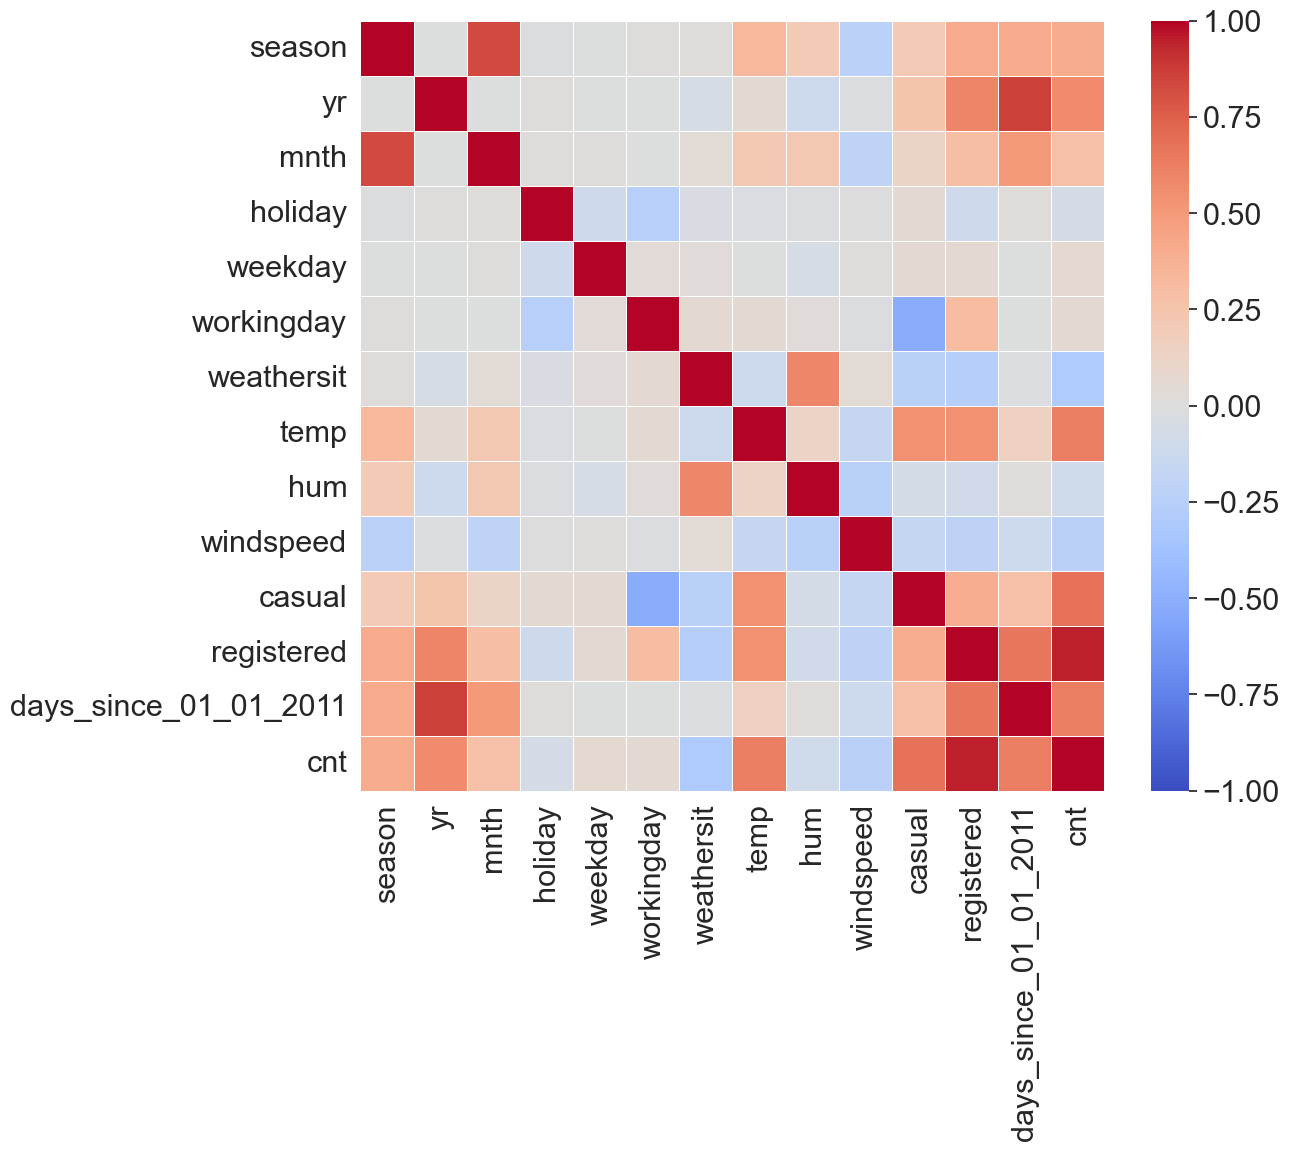

In [18]:
correlation_heatmap(X)

### 1.2.1 The intercept term
Without intercept term a e.g. linear model can not compensate for a target with a shifted mean value / mean value different to zero

In [19]:
bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")
bike_data.add_target("cnt")
bike_data.add_feature("temp")
bike_data.add_feature("days_since_01_01_2011")
bike_data.add_feature("workingday")
X, y = bike_data.return_Xy()

FeatureModel(->Not fully specified yet!)
FeatureModel(cnt ~ -1 + temp )
FeatureModel(cnt ~ -1 + temp + days_since_01_01_2011 )
FeatureModel(cnt ~ -1 + temp + days_since_01_01_2011 + workingday )


In [20]:
y.mean()

cnt    4504.348837
dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression(fit_intercept=False)
regr.fit(X, y)

LinearRegression(fit_intercept=False)

In [22]:
regr.coef_

array([[136.86706091,   5.62727525, 400.49536081]])

In [23]:
X.columns

Index(['temp', 'days_since_01_01_2011', 'workingday'], dtype='object')

In [24]:
X, y = bike_data.return_Xy()
regr.fit(X, y)
print(regr.coef_)

[[136.86706091   5.62727525 400.49536081]]


### 1.2.2 Rescaling and shifting numerical features

In [25]:
def center_temp(df):
    df.temp = df.temp - df.temp.mean()
    return df 
    
X, y = bike_data.return_Xy(transform_before=center_temp)

In [26]:
regr.fit(X, y)
print(regr.coef_)

[[ 105.77855817    8.4828651  1461.29911006]]


Notice how only the intercept term changed

Q: 
- What does this intercept value now mean / reflect? 
- What did the intercept value before centering the temperature feature?

Q: 
- What does the temperature weight mean? 
- When interpreting the weight what are you assuming? 
- Is your assumption justified, how could you check (at least an important part that underlies the assumption)? Hint: Correlations

In [27]:
def standardize_temp(df):
    df.temp = (df.temp - df.temp.mean())/df.temp.std()
    return df 
    
X, y = bike_data.return_Xy(transform_before=standardize_temp)

In [28]:
regr.fit(X, y)
print(regr.coef_)

[[ 910.05491069    8.4828651  1461.29911006]]


Q: What is the ratio between the temperature weight before and after standardize?

Q: After standardising numerical features. Is it easier to interpret the weights individually? Is it easier to compare the magnitude of weights to other weigths?

Q: How to obtain a probabilistic estimate of weights?

In [29]:
import statsmodels.api as sm

In [30]:
sm_model = sm.OLS(y, X)

In [31]:
results = sm_model.fit()

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              2380.
Date:                Sun, 14 May 2023   Prob (F-statistic):                        0.00
Time:                        19:15:23   Log-Likelihood:                         -6378.9
No. Observations:                 731   AIC:                                  1.276e+04
Df Residuals:                     728   BIC:                                  1.278e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
temp                    910.0549     55.498     16.398      0.000     801.100    1019.010
days_since_01_01_2011     8.4829      0.188     45.120      0.000       8.114       8.852
workingday             1461.2991     95.613     15.284      0.000    1273.590    1649.009
==============================================================================
Omnibus:                       71.671   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.116
Skew:                          -0.608   Prob(JB):                     6.18e-31
Kurtosis:                       4.758   Cond. No.                         730.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.2.3 Encoding categorical features

In [33]:
bike_data.df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'days_since_01_01_2011'],
      dtype='object')

In [34]:
def winter(season):
    return (season==1).astype(int)

def spring(season):
    return (season==2).astype(int)

def summer(season):
    return (season==3).astype(int)

In [35]:
bike_data.add_function_feature(winter, "season")
bike_data.add_function_feature(spring, "season")
bike_data.add_function_feature(summer, "season")

FeatureModel(cnt ~ -1 + temp + days_since_01_01_2011 + workingday + winter(season) )
FeatureModel(cnt ~ -1 + temp + days_since_01_01_2011 + workingday + winter(season) + spring(season) )
FeatureModel(cnt ~ -1 + temp + days_since_01_01_2011 + workingday + winter(season) + spring(season) + summer(season) )


In [36]:
X, y = bike_data.return_Xy()

In [37]:
X

,temp,days_since_01_01_2011,workingday,winter(season),spring(season),summer(season)
0,8.175849,0.0,0.0,1.0,0.0,0.0
1,9.083466,1.0,0.0,1.0,0.0,0.0
2,1.229108,2.0,1.0,1.0,0.0,0.0
3,1.400000,3.0,1.0,1.0,0.0,0.0
4,2.666979,4.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
726,3.945849,726.0,1.0,1.0,0.0,0.0
727,3.906651,727.0,1.0,1.0,0.0,0.0
728,3.906651,728.0,0.0,1.0,0.0,0.0
729,4.024151,729.0,0.0,1.0,0.0,0.0


Q: Why do you not need a fourth category for season=fall? Hint: Think about what the intercept term now means / for what category it stands for

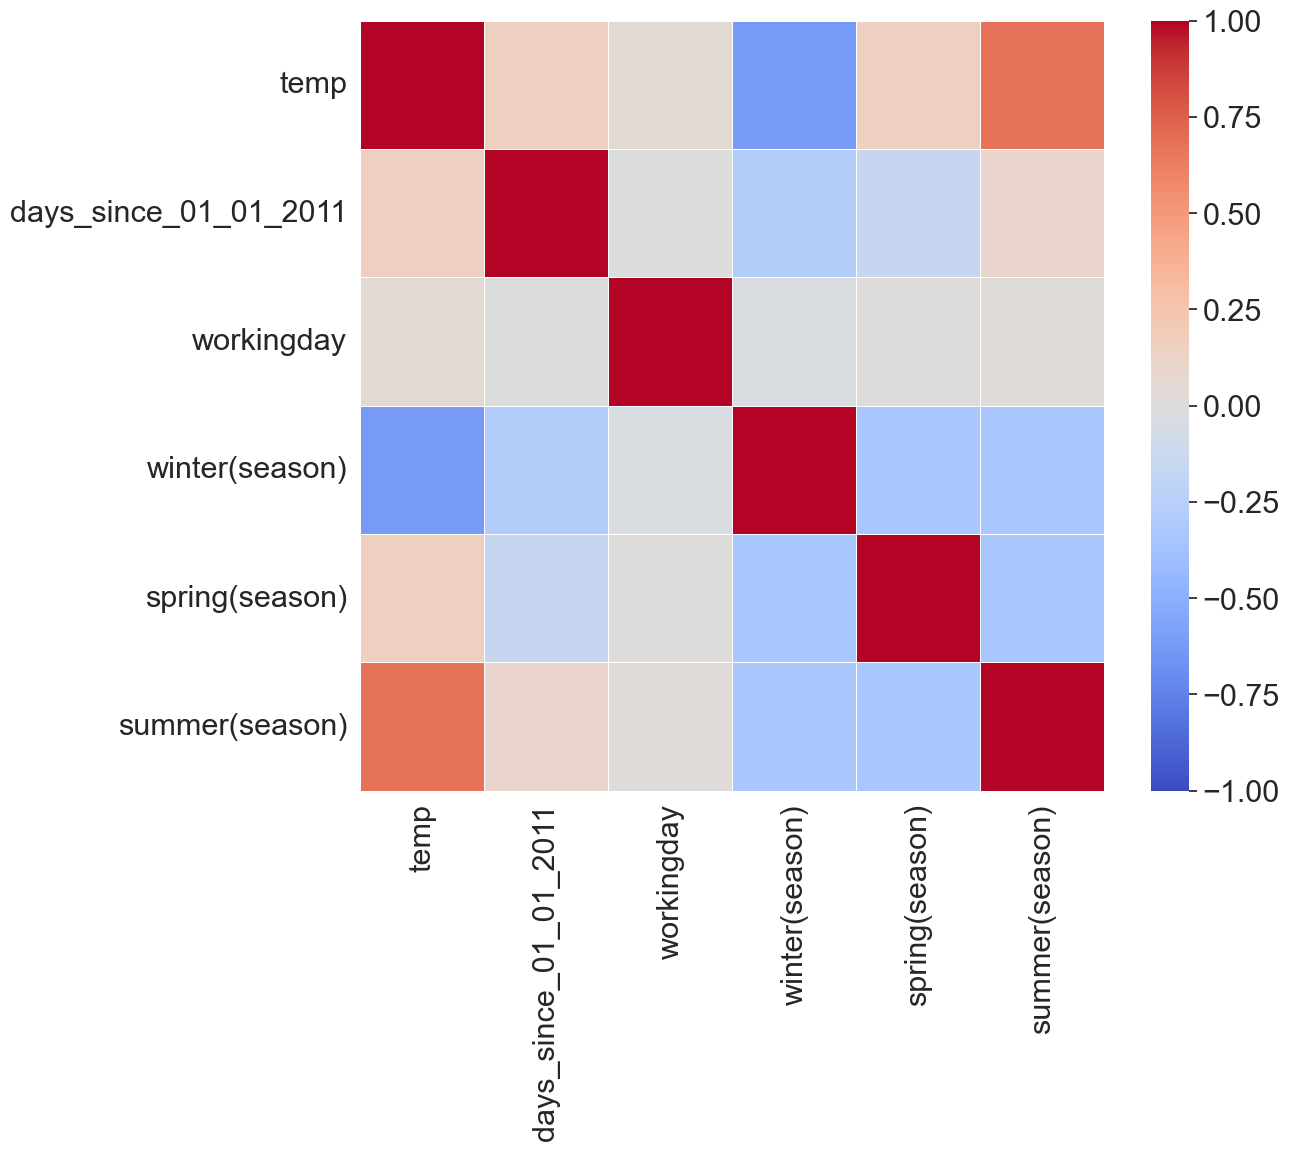

In [38]:
correlation_heatmap(X)

In [39]:
from sklearn.linear_model import Lasso

In [40]:
clf = Lasso(random_state=1, fit_intercept=False, alpha=1.0)

In [41]:
clf.fit(X, y)

Lasso(fit_intercept=False, random_state=1)

In [42]:
X.columns

Index(['temp', 'days_since_01_01_2011', 'workingday', 'winter(season)',
       'spring(season)', 'summer(season)'],
      dtype='object')

In [43]:
clf.coef_

array([ 133.03203316,    5.66689998,  267.99086363,  142.06528998,
        719.71851607, -160.08687953])

Q: Look at the coefficient of the `is_summer` feature, can you interpret it as: **compared to `is_fall` people tend to rent 120 bikes less**? Why is that problematic? Hint: What is high in the summer?

# Homework

## 1.1 
Create a function that receives a boolean `standardize` and returns a tuple `X,y` where
- y: is the number of rented bikes for a day
- X: is the temperature of that day, the windspeed, the days since 01.01.2011, and the humidity. Finally, there should also be an intercept term. If `standardize` is `True`, then X should be standardized

In [44]:
bike_data.df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'days_since_01_01_2011'],
      dtype='object')

In [45]:
def ex_1_1(standardize: bool) -> tuple[np.array, np.array]:
    
    with contextlib.redirect_stdout(None):
        # in here nothing gets printed
        bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")
        bike_data.add_target("cnt")
        bike_data.add_feature("temp")
        bike_data.add_feature("windspeed")
        bike_data.add_feature("days_since_01_01_2011")
        bike_data.add_feature("hum")
        bike_data.intercept = True
        
    def standardize_fun(df):
        from sklearn.preprocessing import StandardScaler
        if standardize:
            scaler = StandardScaler()
            df[['temp', 'windspeed', 'days_since_01_01_2011', 'hum']] = scaler.fit_transform(df[['temp', 'windspeed', 'days_since_01_01_2011', 'hum']])
        
        return df 
    
    return bike_data.return_Xy(transform_before=standardize_fun if standardize else None)


In [45]:
def ex_1_1(standardize: bool) -> tuple[np.array, np.array]:
    
    with contextlib.redirect_stdout(None):
        # in here nothing gets printed
        bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")
        bike_data.add_target("cnt")
        bike_data.add_feature("temp")
        bike_data.add_feature("windspeed")
        bike_data.add_feature("days_since_01_01_2011")
        bike_data.add_feature("hum")
        bike_data.intercept = True
        
    def standardize_fun(df):
        from sklearn.preprocessing import StandardScaler
        if standardize:
            scaler = StandardScaler()
            df[['temp', 'windspeed', 'days_since_01_01_2011', 'hum']] = scaler.fit_transform(df[['temp', 'windspeed', 'days_since_01_01_2011', 'hum']])
        
        return df 
    
    return bike_data.return_Xy(transform_before=standardize_fun if standardize else None)


In [46]:
ex_1_1(True)

(     Intercept      temp  windspeed  days_since_01_01_2011       hum
 0          1.0 -0.826662  -0.387892              -1.729683  1.250171
 1          1.0 -0.721095   0.749602              -1.724944  0.479113
 2          1.0 -1.634657   0.746632              -1.720205 -1.339274
 3          1.0 -1.614780  -0.389829              -1.715466 -0.263182
 4          1.0 -1.467414  -0.046307              -1.710728 -1.341494
 ..         ...       ...        ...                    ...       ...
 726        1.0 -1.318665   2.061426               1.710728  0.175807
 727        1.0 -1.323224  -0.452131               1.715466 -0.266238
 728        1.0 -1.323224  -0.853552               1.720205  0.878392
 729        1.0 -1.309558   2.069444               1.724944 -1.015664
 730        1.0 -1.528225  -0.460201               1.729683 -0.354061
 
 [731 rows x 5 columns],
         cnt
 0     985.0
 1     801.0
 2    1349.0
 3    1562.0
 4    1600.0
 ..      ...
 726  2114.0
 727  3095.0
 728  1341.0
 72

In [47]:
compare("ex_1_1", ex_1_1)

Great work!


## 1.2
Create a function that excepts the L1-regularisation parameter `alpha` and a boolean `standardize` and fits a `Lasso`-Regressor with `random_state`=1 and `fit_intercept`=False on the, depending on the input, **standardized** dataset of `ex_1_1`. It should return the number of rescale-R2-score where the number of features is equal to the number of non-zero weights. You can find the required formula on page 40 of the interpretable ML book (https://christophm.github.io/interpretable-ml-book/interpretable-ml.pdf).

You may re-use the function `ex_1_1` inside `ex_1_2`.

Bonus (technical programming stuff): Why might it be beneficial to import `Lasso` **inside** the function, and also define everything you need **inside** that function? 

In [48]:
def ex_1_2(alpha: float, standardize: bool) -> (float, np.array):
    
    import numpy as np 
    from sklearn.linear_model import Lasso
    from sklearn.metrics import r2_score
    X, y = ex_1_1(standardize)
    
    def scaled_r2_score(ytrue, ypred, p, n):
        r2 = r2_score (ytrue, ypred) 
        return 1 - ((1 - r2) *((n - 1) / (n - p- 1)))
    
    
        
    lasso = Lasso(alpha=alpha, random_state=1, fit_intercept = False)
    lasso.fit(X, y)
    
    
    coef = lasso.coef_
    
    
    ypred = lasso.predict(X)
    n,p  = X.shape[0], X.shape[1]
    
    
    return scaled_r2_score(y, ypred, p, n), coef




In [49]:
ex_1_2(alpha=0.1, standardize = False)

(0.7346288107000903,
 array([ 3305.4192056 ,   124.3659432 , -3487.18064236,     4.89460636,
        -2905.16602788]))

In [50]:
compare("ex_1_2", ex_1_2)

Great work!


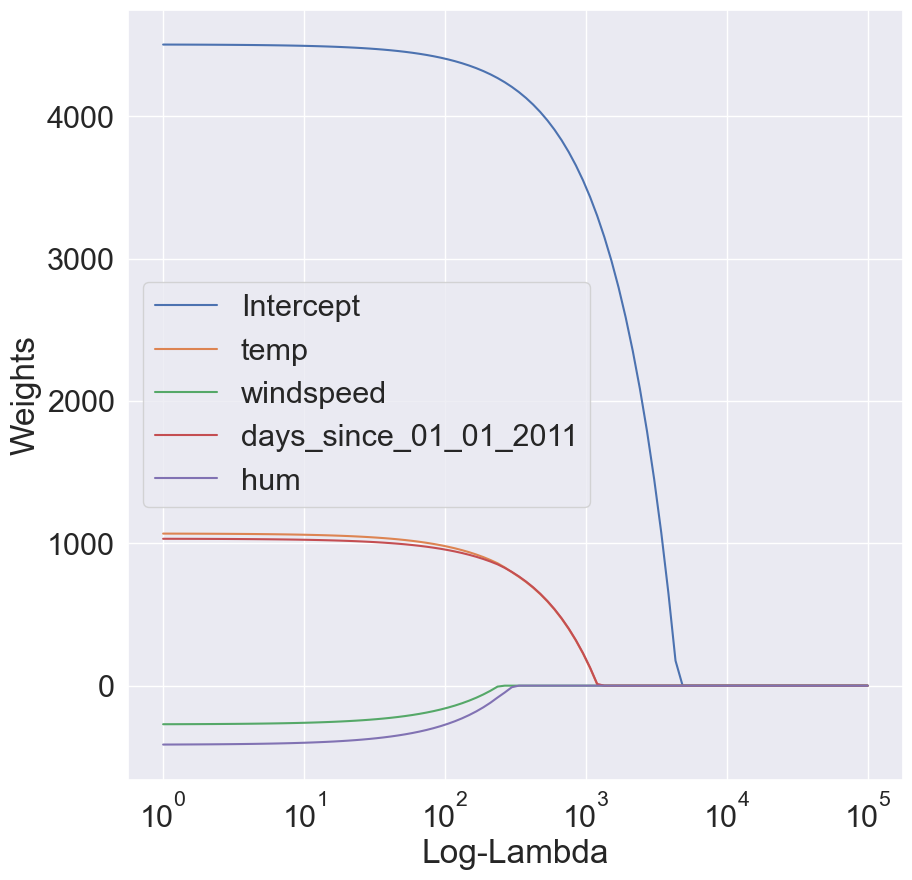

In [51]:
def create_lasso_regularisation_plot(ex_1_2):
    alphas = np.logspace(0, 5, 100)
    
    X, y = ex_1_1(True)
    ex_1_2_out = list(map(lambda a: list(ex_1_2(a, True)), alphas))
    
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_xscale('log')

    for i,feature_name in enumerate(X.columns):
        plt.plot(alphas, [ex_1_2_out[a][1][i] for a in range(len(alphas))], label=feature_name)

    plt.legend()
    plt.xlabel("Log-Lambda")
    plt.ylabel("Weights")
    return 

#TODO: uncomment this
create_lasso_regularisation_plot(ex_1_2)

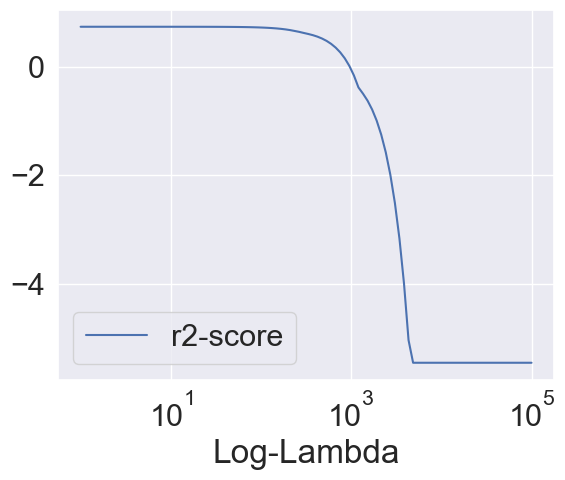

In [52]:
def create_r2_score_plot(ex_1_2):
    alphas = np.logspace(0, 5, 100)
    
    ex_1_2_out = list(map(lambda a: list(ex_1_2(a, True)), alphas))
    plt.plot(alphas, [ex_1_2_out[a][0] for a in range(len(alphas))], label="r2-score")
    ax = plt.gca()
    ax.set_xscale('log')
    plt.legend()
    plt.xlabel("Log-Lambda")
    
#TODO: uncomment this
create_r2_score_plot(ex_1_2)

Q: What does the r2-score tell you if it passes the x-axis, i.e. if it becomes lower than zero?

## 1.3 

Use the function `naive_effect_plot` to generate an effect plot of the Lasso-Algorithm with `alpha`=1.0 and `random_state`=1 and trained on the **not standardized** dataset from exercise `1_1`.
Where in this effect plot would the datapoint with the lowest rented bikes and the highest rented bikes lie? What is the feature in which these two datapoins differ the most? 
Write a function that returns the effect difference between these two data points for this feature.

In [53]:
import copy
def naive_effect_plot(X, y, coef):
    """
    Make sure that X is *not* standardized. This would defeat the purpose of an effect plot!
    """
    
    Xmean = X.mean(axis=0)
    Xstd = X.std(axis=0)
    vary_features = {}
    
    steps=3
    for col in X.columns:
        X_grid = []
        for a in np.linspace(-1,1,steps):
            Xtemp = copy.copy(Xmean)
            Xtemp[:] = 0
            Xtemp[col] = Xmean[col]+a*Xstd[col]
            X_grid.append(Xtemp)
        # prediction + intercept
        y_grid = np.dot(np.array(X_grid), coef)
        vary_features.update({col: y_grid})
    
    pd.DataFrame(vary_features).boxplot(vert=False)
    plt.xlabel(y.columns[0])
    plt.ylabel("features")
    plt.show()


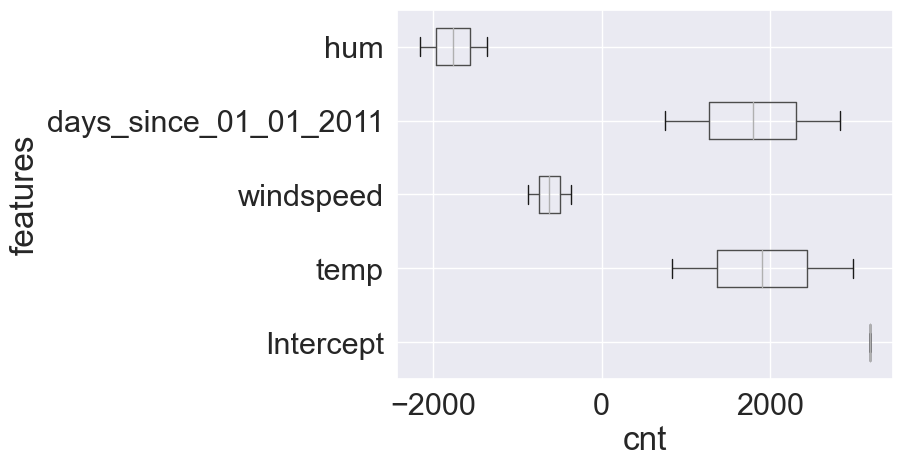

In [54]:
#TODO: uncomment this
X, y = ex_1_1(False)
_, coef = ex_1_2(1.0, False)

naive_effect_plot(X, y, coef)

In [55]:
X

,Intercept,temp,windspeed,days_since_01_01_2011,hum
0,1.0,8.175849,0.160446,0.0,0.805833
1,1.0,9.083466,0.248539,1.0,0.696087
2,1.0,1.229108,0.248309,2.0,0.437273
3,1.0,1.400000,0.160296,3.0,0.590435
4,1.0,2.666979,0.186900,4.0,0.436957
...,...,...,...,...,...
726,1.0,3.945849,0.350133,726.0,0.652917
727,1.0,3.906651,0.155471,727.0,0.590000
728,1.0,3.906651,0.124383,728.0,0.752917
729,1.0,4.024151,0.350754,729.0,0.483333


In [56]:



def ex_1_3() -> float:
    X, y = ex_1_1(False)
    _, coef = ex_1_2(1.0, False)
    
    #TODO
    Xmin = X.loc[667]
    Xmax = X.loc[623]
    #TODO
    return (coef * (Xmax - Xmin)).max()

In [57]:
compare("ex_1_3", ex_1_3)

Great work!


In [58]:
#TODO: uncomment this
ex_1_3()

1060.7053327432864

Q: What did you think was going on that day? How could you check? What other features are there that we haven't used?

## 1.4

Maybe people care less about temperature if they have to get to work and rent a bike regardless. How can we check that? -> By adding an interaction feature between `temp` and `workingday`

First, make a new dataset `cnt ~ 1 + temp + workingday + interaction(temp, workingday)`. No standardisation of the temperature feature!

Your interaction function should have the effect that your linear model can fit two different weights/slopes for the temperature feature depending on whether or not the day was a workingday.

Then write a function that fits a simple Linear Regression model (not LASSO!) on the dataset and outputs a tuple of floats where the first is the increase of number of rented bikes per degree if workingday, and the second float is the increase of number of rented bikes per degree if not a working day

In [59]:
def ex_1_4() -> tuple[float, float]:
    
    def interaction(temp, workingday):
        return temp * workingday
        pass
    
    bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")
    bike_data.add_target("cnt")
    bike_data.add_feature("temp")
    bike_data.add_feature("workingday")
    bike_data.add_function_feature(interaction,'temp',['workingday'])
    bike_data.intercept = True
           
    #TODO
    from sklearn.linear_model import LinearRegression
    X,y = bike_data.return_Xy()
    model = LinearRegression(fit_intercept=False)
    model.fit(X,y)
    w_temp = model.coef_[0][1]
    w_workingday = model.coef_[0][2]
    w_temp_and_workingday = model.coef_[0][3]
    # TODO

    return w_temp + w_temp_and_workingday ,  w_temp

In [60]:
compare("ex_1_4", ex_1_4)

Great work!


In [61]:
w_of_temp_if_is_workingday, w_of_temp_if_isnt_workingday = ex_1_4()

FeatureModel(->Not fully specified yet!)
FeatureModel(cnt ~ -1 + temp )
FeatureModel(cnt ~ -1 + temp + workingday )
FeatureModel(cnt ~ -1 + temp + workingday  + interaction(temp,workingday))


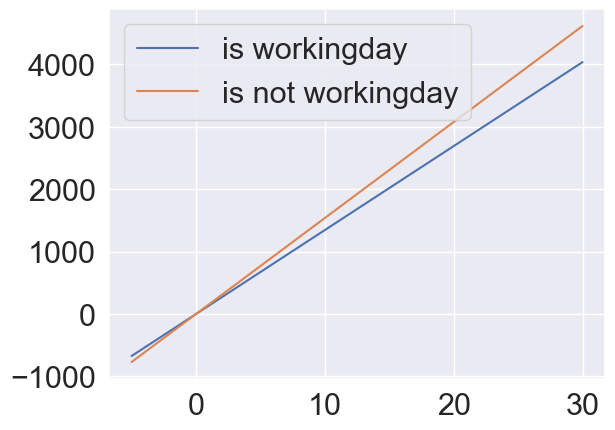

In [62]:
temps = np.linspace(-5, 30, 100)
plt.plot(temps, w_of_temp_if_is_workingday*temps, label="is workingday")
plt.plot(temps, w_of_temp_if_isnt_workingday*temps, label="is not workingday")
plt.legend()
plt.show()

## 1.5
Up to this point we have only considered modeling a linear dependence for the target variable of the temperature feature. It seems more natural that this effect saturates at higher temperatures (people find it too warm to ride a bike). Let's try to capture this by expanding up our one temperature feature into many different features using smooth basis functions. This class of model is called a linear additive model.

Write a function that as input takes the scale parameter `s` and a list of floats called `centers` and then it first creates the following dataset `cnt ~ 1 + temp  + gaussian(temp,centers[0],s) + gaussian(temp,centers[1],s) + ... + gaussian(temp,centers[-1],s)` where the function `gaussian` is given by 
$$g(t, c, s) = \exp({-\frac{(t-c)^2}{s^2}})$$
and where the center and scale parameter $s$ are given by the function input.

Then, the function should fit a Linear Regression and return the coefficients/weights.

In [63]:
def ex_1_5(centers: list[float], scale: float) -> np.ndarray:
    # we just make this function global so that we can re-use it out of scope (without passing it)
    global gaussian
    def gaussian(temp, center, scale=scale):
        #TODO
        return np.exp(-(np.square(temp- center))/np.square(scale))
        pass

    bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")
    #TODO
    bike_data.add_target('cnt')
    bike_data.add_feature('temp')
    for center in centers:
        bike_data.add_function_feature(gaussian,'temp',[[center,scale]])
        bike_data.intercept = True
    X, y = bike_data.return_Xy(transform_before = None)
    from sklearn.linear_model import LinearRegression
    model = LinearRegression(fit_intercept=False)
    #TODO
    model.fit(X,y)
    coef = model.coef_
    return coef[0]


In [64]:
ex_1_5(centers=[2.8, 1.9], scale=2.0)

FeatureModel(->Not fully specified yet!)
FeatureModel(cnt ~ -1 + temp )
FeatureModel(cnt ~ -1 + temp  + gaussian(temp,2.8,2.0))
FeatureModel(cnt ~ 1 + temp  + gaussian(temp,2.8,2.0) + gaussian(temp,1.9,2.0))


array([ 2775.74822177,   120.90822772,  -533.36142331, -1145.70347804])

In [65]:
compare("ex_1_5", ex_1_5)

Great work!


In [66]:
def plot_temperature_dependence(coef, centers):
    temps = np.linspace(-5, 30, 100)
    gaussian_prediction = coef[:, 2:]@np.array(list(map(lambda center: gaussian(temps, center), centers)))
    linear_prediction = coef[:, 1]*temps
    intercept = coef[:, 0]
    plt.plot(temps, gaussian_prediction[0]+linear_prediction+intercept)
    plt.xlabel("Temperature [deg]")
    plt.ylabel("cnt")

In [67]:
#TODO
centers = []
scale=5
#TODO: uncomment this
#plot_temperature_dependence(ex_1_5(centers, scale), centers)

In [68]:
from ce1_compare import scores, grade
scores

{'ex_1_1': True,
 'ex_1_2': True,
 'ex_1_3': True,
 'ex_1_4': True,
 'ex_1_5': True}

In [69]:
#TODO: run this
write_submission_txt()

In [70]:
grade("ce1_Srusti_Ujjinimath.txt")

'100.0% are correct'